In [1]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.py_causal_wrapper import PyCausalUtil 
from aitia_explorer.metrics.graph_metrics import GraphMetrics
from aitia_explorer.util.graph_util import GraphUtil
from aitia_explorer.target_data.loader import TargetData
from aitia_explorer.app import App
from pycausal.pycausal import pycausal

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
simulated_data = TargetData.simulated_data_1()
simulated_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,1,0,0,1,2,0,1,2,1
1,2,1,0,0,1,1,1,0,1,2
2,0,2,1,1,1,0,0,2,2,1
3,0,1,0,0,0,1,2,1,1,1
4,0,1,0,1,1,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,2,1,1,1
996,1,0,0,2,1,2,2,2,0,0
997,0,1,1,0,0,1,0,2,2,1
998,1,2,0,0,0,2,2,0,1,0


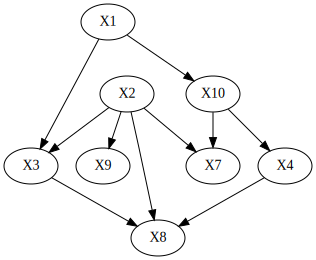

In [3]:
target_graph_str = TargetData.simulated_data_1_graph()
causal_graph_target = GraphUtil.get_causal_graph_from_dot(target_graph_str)
causal_graph_target.draw()

In [4]:
target_graph = GraphUtil.get_nxgraph_from_dot(target_graph_str)

In [5]:
pc = pycausal()
pc.start_vm()

In [6]:
aitia_ex = App()
analysis_results, summary = aitia_ex.run_analysis(simulated_data, target_graph_str=target_graph_str, pc=pc)
summary

digraph g {
 "X1" -> "X3" [arrowtail=none, arrowhead=normal];
 "X10" -> "X4" [dir=both, arrowtail=normal, arrowhead=none];
 "X2" -> "X7" [arrowtail=none, arrowhead=normal];
 "X2" -> "X9" [arrowtail=none, arrowhead=normal];
 "X10" -> "X7" [dir=both, arrowtail=normal, arrowhead=none];
 "X2" -> "X8" [arrowtail=none, arrowhead=normal];
 "X1" -> "X10" [arrowtail=none, arrowhead=normal];
 "X4" -> "X8" [arrowtail=none, arrowhead=normal];
 "X3" -> "X8" [arrowtail=none, arrowhead=normal];
 "X2" -> "X3" [arrowtail=none, arrowhead=normal];
}



Continuous Data: expect 10 variables but found 0.


Continuous Data: expect 10 variables but found 0.


Continuous Data: expect 10 variables but found 0.


Continuous Data: expect 10 variables but found 0.


Continuous Data: expect 10 variables but found 0.


Continuous Data: expect 10 variables but found 0.


,Algorithm,Ind Relations Diff,Isomorphic to Target?,AURC,SHD
0,BayesEst,-2453,False,0.4125,10
1,FCI,-733,False,0.4125,10
2,PC,-733,False,0.4125,10
3,FGES-continuous,-733,False,0.4125,10
4,FGES-discrete,-2333,False,0.4125,10
5,GFCI-continuous,-733,False,0.4125,10
6,GFCI-discrete,-2333,False,0.4125,10
7,RFCI-continuous,-733,False,0.4125,10
8,RFCI-discrete,-2453,False,0.4125,10


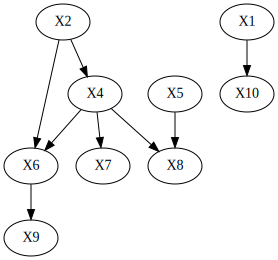

In [8]:
analysis_results[0]['causal_graph'].draw()